1. import libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

2. load dataset

In [3]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

3. DataPreproccessing 

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

4. Drop which are not required

In [8]:
df.drop(columns=["CustomerID",'Gender'], axis=1,inplace=True)

In [9]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


5. EDA

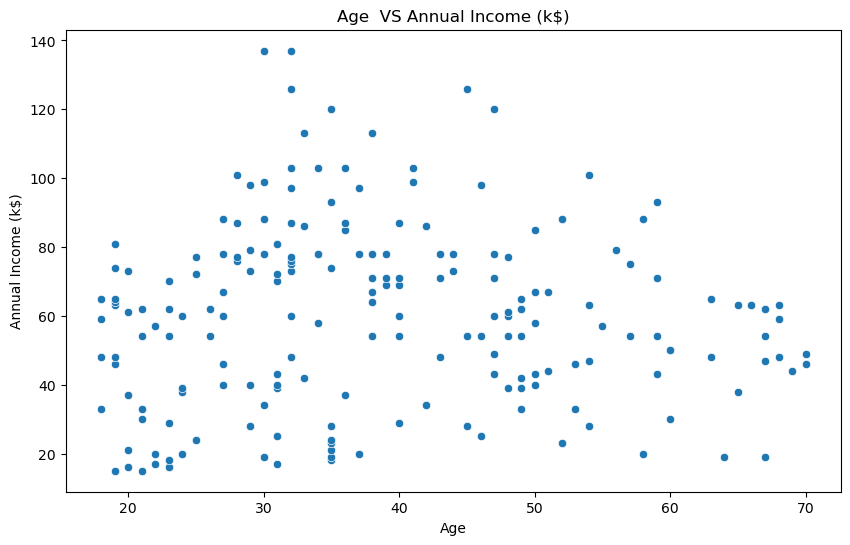

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Annual Income (k$)',data=df)
plt.title("Age  VS Annual Income (k$)")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

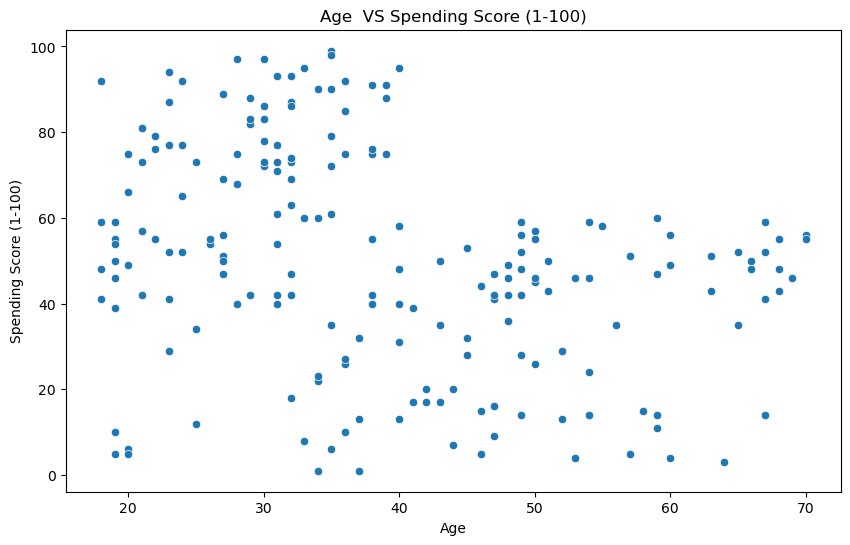

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df)
plt.title("Age  VS Spending Score (1-100)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

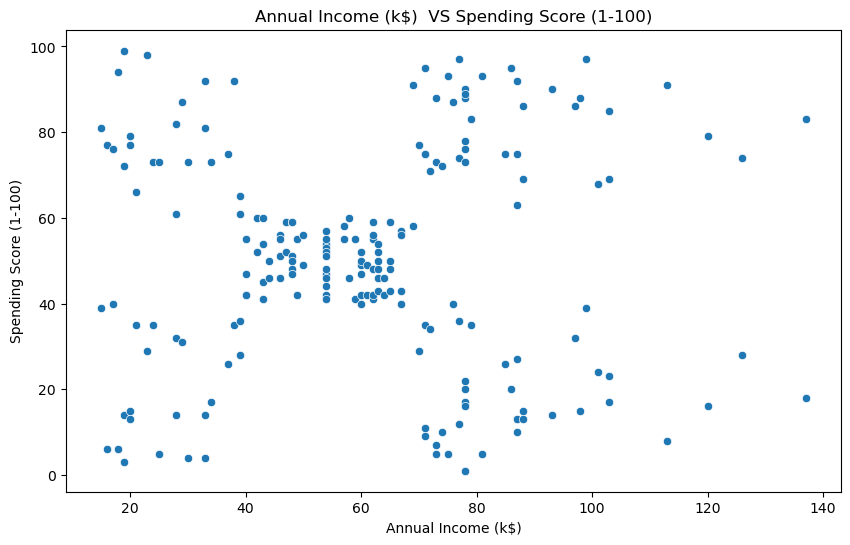

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)
plt.title("Annual Income (k$)  VS Spending Score (1-100)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

5. Feature Engineering 

In [13]:
#find the skewness of the data 
df.skew()

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [14]:
def skewness_name(skewness):
    if skewness >0:
        return "Right Skewed"
    elif skewness <0:
        return "left skewed"
    else:
        return "Normal"
print("Skewness of Age :",skewness_name(df["Age"].skew()))
print("Skewness of Annual Income :",skewness_name(df["Annual Income (k$)"].skew()))
print("Skewness of Spending Score  :",skewness_name(df["Spending Score (1-100)"].skew()))

Skewness of Age : Right Skewed
Skewness of Annual Income : Right Skewed
Skewness of Spending Score  : left skewed


In [15]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
df=pd.DataFrame(scaled_data,columns=df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [16]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


In [17]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5,random_state=42)
model.fit(df)
df['Cluster']=model.labels_
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


In [27]:
import pickle
with open('kmeans_model.pkl','wb') as file:
    pickle.dump(model,file)

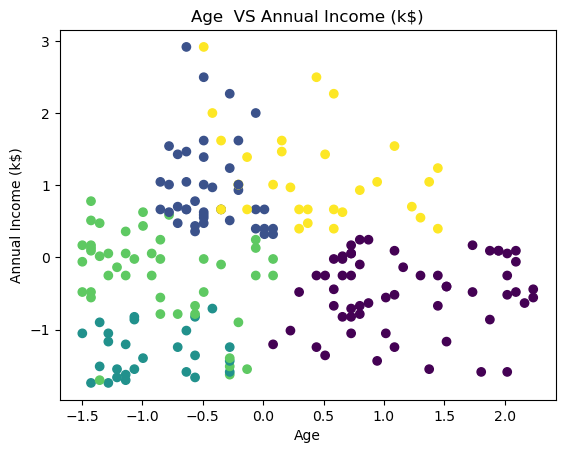

In [18]:
plt.scatter(df["Age"],df["Annual Income (k$)"],c=df['Cluster'])
plt.title("Age  VS Annual Income (k$)")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

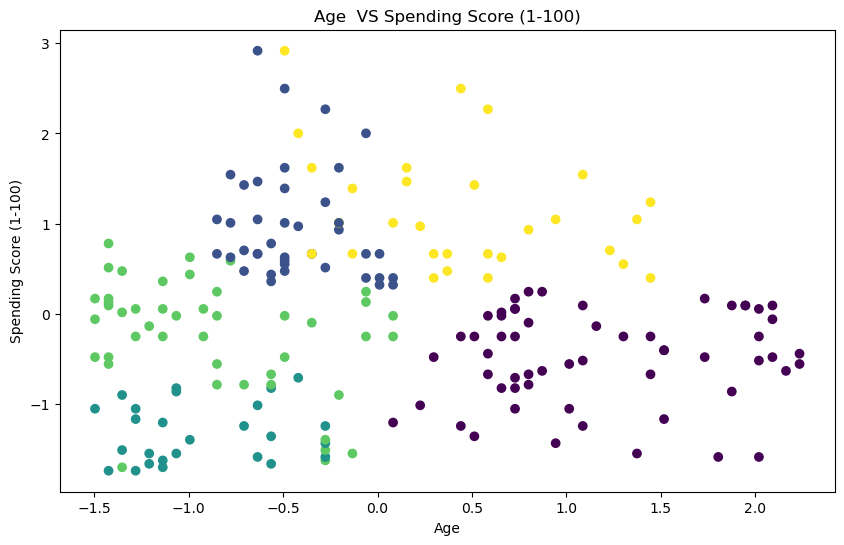

In [19]:

plt.figure(figsize=(10,6))
plt.scatter(df["Age"],df["Annual Income (k$)"],c=df['Cluster'])
plt.title("Age  VS Spending Score (1-100)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

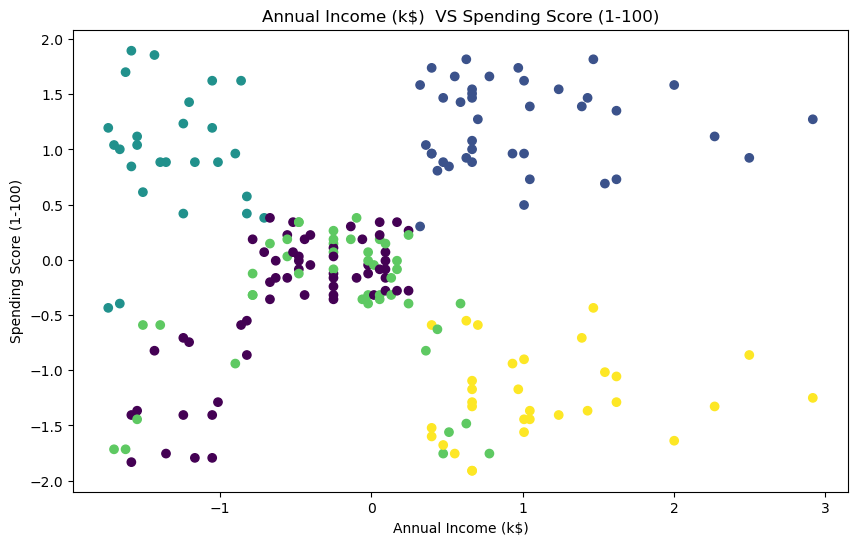

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],c=df['Cluster'])
plt.title("Annual Income (k$)  VS Spending Score (1-100)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [21]:
df.to_csv("clustered_mall_customers.csv",index=False)

In [22]:
new_data=pd.read_csv("clustered_mall_customers.csv")
new_data.head()


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

y=new_data["Cluster"]
x=df.drop("Cluster",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("Accuracy_Score :",accuracy_score(y_test,y_pred))

Accuracy_Score : 0.975


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion='entropy',max_depth=10)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print("Accuracy_Score :",accuracy_score(y_test,y_pred))

Accuracy_Score : 0.95


In [25]:
import pickle
with open('knn_model.pkl','wb') as file:
    pickle.dump(knn,file)